In [1]:
import pandas as pd
import numpy as np
import ast
import random
import os
import sys
sys.path.append('../..')
from modules.many_features import utils, constants
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)

#### X test df

In [3]:
# # df = pd.read_csv('../../data/more_features/more_feats_correlated_noisy_6.csv')
# df = df.fillna(-1)
# class_dict = constants.CLASS_DICT
# df['label'] = df['label'].replace(class_dict)
# X = df.iloc[:, 0:-1]
# y = df.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)
# X_test_df = pd.concat([X_test, y_test], axis=1)
# X_test_df = X_test_df.reset_index(drop=True)
# X_test_df.head()
X_test_df = pd.read_csv('../../../anemia_ml4hc/data/test_set_constant.csv')
X_test_df.head()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,serum_iron,rbc,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
0,7.116363,-1.000000,3.781573,2.738413,-1.000000,95.904198,68.457895,2.226085,0,1.892912,39.808550,110.329197,64.404350,21.654404,73.787009,21.349089,-1.000000,5
1,8.125320,92.230003,4.231419,1.188039,143.365567,104.057204,204.747831,2.342554,0,0.652614,13.478089,-1.000000,32.705481,-1.000000,43.520272,24.375961,142.815207,1
2,11.309450,38.324563,-1.000000,-1.000000,455.077909,76.402602,-1.000000,4.440732,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,33.928350,-1.000000,4
3,13.763858,253.513394,2.262606,0.551444,453.772884,82.781943,90.101466,4.987993,0,0.853521,104.005514,34.639227,0.963866,22.083012,88.891838,41.291574,19.856071,0
4,11.464002,-1.000000,-1.000000,-1.000000,320.964653,104.287127,-1.000000,3.297819,0,1.163516,121.616315,105.895897,-1.000000,9.337462,-1.000000,34.392007,-1.000000,7


#### The test df

In [4]:
# test_df = pd.read_csv('../../test_dfs/many_features/0.1/correlated/test_df3_noisy6_23000000.csv')
test_df = pd.read_csv('../../../anemia_ml4hc/test_dfs/dqn_pr_test_df_15000000.csv')
test_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success
0,0.0,4.0,1.0,5.0,5.0,"['hemoglobin', 'rbc', 'ret_count', 'Hemolytic ...",0.0,1.0
1,1.0,4.0,1.0,1.0,1.0,"['hemoglobin', 'rbc', 'segmented_neutrophils',...",0.0,1.0
2,2.0,7.0,1.0,4.0,4.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 't...",0.0,1.0
3,3.0,2.0,1.0,0.0,0.0,"['hemoglobin', 'No anemia']",0.0,1.0
4,4.0,4.0,-1.0,7.0,7.0,"['hemoglobin', 'rbc', 'segmented_neutrophils',...",1.0,1.0


In [5]:
len(X_test_df), len(test_df)

(14000, 14000)

In [6]:
a1 = np.array(test_df['y_actual'], dtype=np.float32)
a2 = np.array(X_test_df['label'], dtype=np.float32)
assert np.array_equal(a1, a2)

#### 0 - No anemia

In [7]:
no_test_df = test_df[test_df.y_actual== 0]
no_x_test_df = X_test_df[X_test_df.label==0]
combined_no_test_df = pd.concat([no_test_df, no_x_test_df], axis=1)
combined_no_test_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success,hemoglobin,ferritin,...,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
3,3.0,2.0,1.0,0.0,0.0,"['hemoglobin', 'No anemia']",0.0,1.0,13.763858,253.513394,...,0,0.853521,104.005514,34.639227,0.963866,22.083012,88.891838,41.291574,19.856071,0
9,9.0,3.0,1.0,0.0,0.0,"['hemoglobin', 'gender', 'No anemia']",0.0,1.0,12.490978,341.360589,...,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,37.472935,-1.000000,0
17,17.0,2.0,1.0,0.0,0.0,"['hemoglobin', 'No anemia']",0.0,1.0,13.890780,150.582769,...,0,0.838111,133.588356,-1.000000,-1.000000,-1.000000,-1.000000,41.672339,-1.000000,0
21,21.0,2.0,1.0,0.0,0.0,"['hemoglobin', 'No anemia']",0.0,1.0,13.857400,32.918871,...,0,1.567181,46.566975,-1.000000,-1.000000,-1.000000,-1.000000,41.572200,-1.000000,0
32,32.0,2.0,1.0,0.0,0.0,"['hemoglobin', 'No anemia']",0.0,1.0,14.749014,97.856707,...,1,1.855077,0.794619,-1.000000,-1.000000,-1.000000,-1.000000,44.247043,-1.000000,0


In [8]:
combined_no_test_df.y_pred.value_counts()

0.0    1969
7.0      15
5.0       6
1.0       4
3.0       3
6.0       3
Name: y_pred, dtype: int64

In [9]:
misdiag_no_df = combined_no_test_df[combined_no_test_df.y_pred != combined_no_test_df.y_actual]
misdiag_no_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success,hemoglobin,ferritin,...,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
1128,1128.0,5.0,-1.0,1.0,0.0,"['hemoglobin', 'rbc', 'segmented_neutrophils',...",0.0,0.0,12.016233,191.713067,...,0,0.373478,130.837743,-1.0,-1.000000,-1.0,-1.000000,36.048698,-1.0,0
1622,1622.0,4.0,-1.0,1.0,0.0,"['hemoglobin', 'rbc', 'segmented_neutrophils',...",0.0,0.0,12.047825,200.607414,...,0,0.655348,104.981196,-1.0,-1.000000,-1.0,-1.000000,36.143474,-1.0,0
2020,2020.0,4.0,-1.0,7.0,0.0,"['hemoglobin', 'gender', 'rbc', 'Inconclusive ...",1.0,0.0,13.022599,-1.000000,...,1,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,39.067796,-1.0,0
2050,2050.0,4.0,-1.0,7.0,0.0,"['hemoglobin', 'gender', 'rbc', 'Inconclusive ...",1.0,0.0,13.007329,-1.000000,...,1,1.918636,75.073342,-1.0,39.694746,-1.0,114.514935,39.021986,-1.0,0
2455,2455.0,5.0,-1.0,3.0,0.0,"['hemoglobin', 'gender', 'rbc', 'ferritin', 'A...",0.0,0.0,13.013171,447.310135,...,1,1.964411,56.354004,-1.0,-1.000000,-1.0,-1.000000,39.039512,-1.0,0


In [10]:
misdiag_no_df.describe()['hemoglobin']

count    31.000000
mean     12.344089
std       0.471058
min      12.000275
25%      12.008556
50%      12.047253
75%      13.006596
max      13.027291
Name: hemoglobin, dtype: float64

In [13]:
a = misdiag_no_df[misdiag_no_df.y_pred==7]
len(a)

15

In [12]:
a.describe()['ret_count']

count    3.000000
mean     1.068383
std      0.832713
min      0.112844
25%      0.783075
50%      1.453306
75%      1.546153
max      1.639000
Name: ret_count, dtype: float64

In [15]:
a[a.gender==0]['hemoglobin'].tolist() #Female

[12.032155877732665,
 12.000274700047946,
 12.001252547492903,
 12.004105457684734,
 12.049602560932836,
 12.031444624556688,
 12.003397631958755,
 12.00490575939168,
 12.048524423100885]

Text(0.5, 1.0, 'Hemoglobin value distribution by gender')

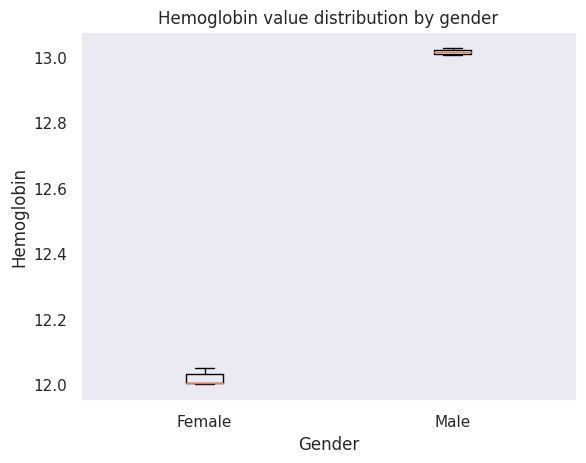

In [32]:
my_dict = {'Female': a[a.gender==0]['hemoglobin'].tolist(), 'Male':a[a.gender==1]['hemoglobin'].tolist()}
sns.set_style('dark')
fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
ax.set_ylabel('Hemoglobin')
ax.set_xlabel('Gender')
ax.set_title('Hemoglobin value distribution by gender')

<AxesSubplot:xlabel='Groups', ylabel='Y-Axis'>

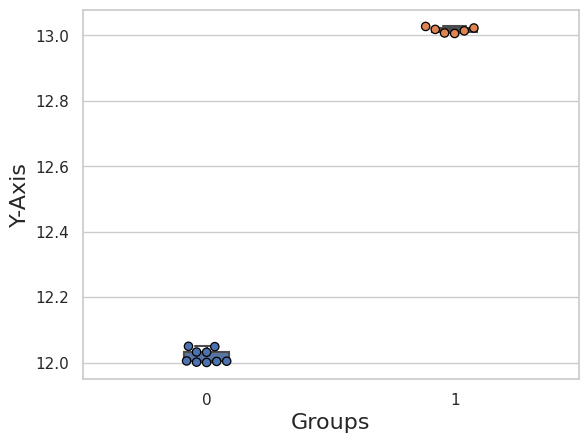

In [29]:
data = my_dict.values()

#Get data in proper format
fixed_data = list(sorted(data))


#Set up the graph parameters
sns.set(context='notebook', style='whitegrid')
sns.utils.axlabel(xlabel="Gender", ylabel="Y-Axis", fontsize=16)


#Plot the graph
sns.boxplot(data=fixed_data, whis=np.inf, width=.18)
sns.swarmplot(data=fixed_data, size=6, edgecolor="black", linewidth=.9)


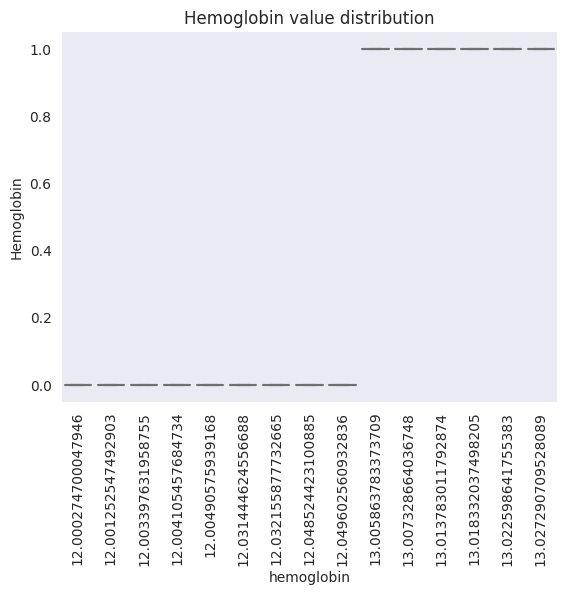

In [24]:
import seaborn as sns
sns.set_style('dark')
gfg = sns.boxplot(data = a, x='hemoglobin', y='gender',palette='pastel')
gfg.set(ylabel = 'Hemoglobin', title = 'Hemoglobin value distribution')
plt.xticks(rotation=90)
sns.despine()
plt.show()    

#### 1 - Vitamin b12

In [12]:
vit_test_df = test_df[test_df.y_actual== 1]
vit_x_test_df = X_test_df[X_test_df.label==1]
combined_vit_test_df = pd.concat([vit_test_df, vit_x_test_df], axis=1)
combined_vit_test_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success,hemoglobin,ferritin,...,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
1,1.0,4.0,1.0,1.0,1.0,"['hemoglobin', 'rbc', 'segmented_neutrophils',...",0.0,1.0,8.125320,92.230003,...,0,0.652614,13.478089,-1.000000,32.705481,-1.000000,43.520272,24.375961,142.815207,1
6,6.0,4.0,1.0,1.0,1.0,"['hemoglobin', 'rbc', 'segmented_neutrophils',...",0.0,1.0,10.304598,91.991143,...,1,1.242521,94.068723,-1.000000,-1.000000,-1.000000,-1.000000,30.913794,-1.000000,1
8,8.0,4.0,1.0,1.0,1.0,"['hemoglobin', 'rbc', 'segmented_neutrophils',...",0.0,1.0,10.605183,-1.000000,...,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,31.815550,-1.000000,1
28,28.0,5.0,1.0,1.0,1.0,"['hemoglobin', 'gender', 'rbc', 'segmented_neu...",0.0,1.0,12.800993,209.486844,...,1,0.319098,132.772775,69.290493,5.894968,1.869214,120.399891,38.402978,10.646225,1
34,34.0,4.0,1.0,1.0,1.0,"['hemoglobin', 'rbc', 'segmented_neutrophils',...",0.0,1.0,8.363671,3.587024,...,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,25.091012,-1.000000,1


In [13]:
combined_vit_test_df.y_pred.value_counts()

1.0    1704
7.0      72
6.0      13
5.0      12
Name: y_pred, dtype: int64

In [14]:
misdiag_vit_df = combined_vit_test_df[combined_vit_test_df.y_pred != combined_vit_test_df.y_actual]
misdiag_vit_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success,hemoglobin,ferritin,...,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
175,175.0,6.0,-1.0,7.0,1.0,"['hemoglobin', 'rbc', 'segmented_neutrophils',...",1.0,0.0,10.266664,425.398924,...,0,0.236122,40.240342,98.877322,-1.000000,3.655631,-1.000000,30.799992,-1.000000,1
261,261.0,5.0,-1.0,7.0,1.0,"['hemoglobin', 'rbc', 'gender', 'ret_count', '...",1.0,0.0,6.391142,-1.000000,...,1,1.813356,47.471161,96.755017,77.322442,26.953680,66.752383,19.173426,21.743563,1
325,325.0,6.0,-1.0,7.0,1.0,"['hemoglobin', 'rbc', 'segmented_neutrophils',...",1.0,0.0,6.895588,-1.000000,...,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,20.686763,-1.000000,1
752,752.0,6.0,-1.0,5.0,1.0,"['hemoglobin', 'rbc', 'gender', 'segmented_neu...",0.0,0.0,7.326256,179.443889,...,0,0.237193,131.090831,103.625415,-1.000000,15.443047,-1.000000,21.978768,-1.000000,1
772,772.0,5.0,-1.0,5.0,1.0,"['hemoglobin', 'rbc', 'gender', 'ret_count', '...",0.0,0.0,7.399389,63.718942,...,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,22.198166,-1.000000,1


In [20]:
a = misdiag_vit_df[misdiag_vit_df.y_pred==7]
a.head()
# b = a[a.segmented_neutrophils >0]
# b.describe()['mcv']

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success,hemoglobin,ferritin,...,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
175,175.0,6.0,-1.0,7.0,1.0,"['hemoglobin', 'rbc', 'segmented_neutrophils',...",1.0,0.0,10.266664,425.398924,...,0,0.236122,40.240342,98.877322,-1.000000,3.655631,-1.000000,30.799992,-1.000000,1
261,261.0,5.0,-1.0,7.0,1.0,"['hemoglobin', 'rbc', 'gender', 'ret_count', '...",1.0,0.0,6.391142,-1.000000,...,1,1.813356,47.471161,96.755017,77.322442,26.953680,66.752383,19.173426,21.743563,1
325,325.0,6.0,-1.0,7.0,1.0,"['hemoglobin', 'rbc', 'segmented_neutrophils',...",1.0,0.0,6.895588,-1.000000,...,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,20.686763,-1.000000,1
780,780.0,6.0,-1.0,7.0,1.0,"['hemoglobin', 'rbc', 'gender', 'segmented_neu...",1.0,0.0,10.032485,-1.000000,...,0,0.586660,108.300311,116.215791,79.035330,13.430866,114.194406,30.097454,-1.000000,1
948,948.0,6.0,-1.0,7.0,1.0,"['hemoglobin', 'rbc', 'gender', 'segmented_neu...",1.0,0.0,8.160073,-1.000000,...,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,24.480220,-1.000000,1


In [27]:
a.trajectory.value_counts()

['hemoglobin', 'rbc', 'gender', 'segmented_neutrophils', 'ret_count', 'Inconclusive diagnosis']                  27
['hemoglobin', 'rbc', 'segmented_neutrophils', 'gender', 'glucose', 'Inconclusive diagnosis']                    13
['hemoglobin', 'rbc', 'gender', 'ret_count', 'Inconclusive diagnosis']                                           11
['hemoglobin', 'rbc', 'segmented_neutrophils', 'gender', 'ret_count', 'Inconclusive diagnosis']                  10
['hemoglobin', 'gender', 'rbc', 'segmented_neutrophils', 'ret_count', 'Inconclusive diagnosis']                   4
['hemoglobin', 'rbc', 'segmented_neutrophils', 'gender', 'creatinine', 'ret_count', 'Inconclusive diagnosis']     2
['hemoglobin', 'gender', 'rbc', 'segmented_neutrophils', 'creatinine', 'ret_count', 'Inconclusive diagnosis']     2
['hemoglobin', 'gender', 'rbc', 'segmented_neutrophils', 'creatinine', 'Inconclusive diagnosis']                  1
['hemoglobin', 'rbc', 'gender', 'segmented_neutrophils', 'ret_count', 'f

In [36]:
traj = "['hemoglobin', 'rbc', 'gender', 'ret_count', 'Inconclusive diagnosis']"
a[a.trajectory==traj].describe()['segmented_neutrophils']

count    11.000000
mean      3.692018
std       1.840266
min       0.771657
25%       2.196415
50%       3.631388
75%       4.909903
max       6.578332
Name: segmented_neutrophils, dtype: float64

#### 2 - Unspecified anemia

In [37]:
unspec_test_df = test_df[test_df.y_actual== 2]
unspec_x_test_df = X_test_df[X_test_df.label==2]
combined_unspec_test_df = pd.concat([unspec_test_df, unspec_x_test_df], axis=1)
combined_unspec_test_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success,hemoglobin,ferritin,...,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
11,11.0,5.0,-1.0,6.0,2.0,"['hemoglobin', 'rbc', 'gender', 'ret_count', '...",0.0,0.0,6.586105,172.149001,...,1,0.861521,5.456323,-1.000000,-1.000000,-1.000000,-1.000000,19.758316,-1.000000,2
12,12.0,5.0,1.0,2.0,2.0,"['hemoglobin', 'rbc', 'segmented_neutrophils',...",0.0,1.0,7.393490,-1.000000,...,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,22.180469,-1.000000,2
39,39.0,5.0,1.0,2.0,2.0,"['hemoglobin', 'rbc', 'segmented_neutrophils',...",0.0,1.0,10.674463,-1.000000,...,0,0.415774,99.575490,-1.000000,47.213699,-1.000000,70.888994,32.023388,-1.000000,2
61,61.0,5.0,1.0,2.0,2.0,"['hemoglobin', 'rbc', 'segmented_neutrophils',...",0.0,1.0,10.683197,176.209374,...,1,0.588055,38.837001,118.185163,71.712274,17.007617,120.239966,32.049592,57.993504,2
64,64.0,5.0,1.0,2.0,2.0,"['hemoglobin', 'rbc', 'segmented_neutrophils',...",0.0,1.0,6.425807,-1.000000,...,1,0.854177,65.709482,-1.000000,38.444797,-1.000000,119.636657,19.277420,11.707747,2


In [38]:
combined_unspec_test_df.y_pred.value_counts()

2.0    1776
5.0       9
7.0       5
6.0       3
Name: y_pred, dtype: int64

In [39]:
misdiag_unspec_df = combined_unspec_test_df[combined_unspec_test_df.y_pred != combined_unspec_test_df.y_actual]
misdiag_unspec_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success,hemoglobin,ferritin,...,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
11,11.0,5.0,-1.0,6.0,2.0,"['hemoglobin', 'rbc', 'gender', 'ret_count', '...",0.0,0.0,6.586105,172.149001,...,1,0.861521,5.456323,-1.00000,-1.000000,-1.000000,-1.000000,19.758316,-1.000000,2
273,273.0,5.0,-1.0,6.0,2.0,"['hemoglobin', 'rbc', 'gender', 'ret_count', '...",0.0,0.0,9.628304,106.265719,...,1,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,28.884913,-1.000000,2
1591,1591.0,5.0,-1.0,7.0,2.0,"['hemoglobin', 'rbc', 'gender', 'ret_count', '...",1.0,0.0,8.911779,-1.000000,...,1,1.566446,3.677901,-1.00000,-1.000000,-1.000000,-1.000000,26.735338,-1.000000,2
2125,2125.0,6.0,-1.0,5.0,2.0,"['hemoglobin', 'rbc', 'gender', 'ret_count', '...",0.0,0.0,7.237909,241.155878,...,1,1.614992,120.304470,35.81269,54.980571,29.071337,46.279219,21.713727,15.542049,2
2662,2662.0,6.0,-1.0,7.0,2.0,"['hemoglobin', 'rbc', 'gender', 'ret_count', '...",1.0,0.0,7.584382,443.547746,...,1,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,22.753147,-1.000000,2


In [40]:
misdiag_unspec_df[(misdiag_unspec_df.y_pred==0) & (misdiag_unspec_df.gender==1)].describe()['hemoglobin']

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: hemoglobin, dtype: float64

#### 3 - Anemia of chronic disease

In [41]:
acd_test_df = test_df[test_df.y_actual== 3]
acd_x_test_df = X_test_df[X_test_df.label==3]
combined_acd_test_df = pd.concat([acd_test_df, acd_x_test_df], axis=1)
combined_acd_test_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success,hemoglobin,ferritin,...,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
13,13.0,5.0,1.0,3.0,3.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 'A...",0.0,1.0,7.248493,360.445195,...,1,0.814285,126.511825,-1.000000,-1.000000,-1.000000,-1.00000,21.745480,-1.000000,3
16,16.0,6.0,1.0,3.0,3.0,"['hemoglobin', 'gender', 'rbc', 'ferritin', 'h...",0.0,1.0,12.474623,485.283040,...,1,1.205270,13.187918,38.154465,19.230585,17.546213,71.58987,37.423868,-1.000000,3
19,19.0,5.0,1.0,3.0,3.0,"['hemoglobin', 'gender', 'rbc', 'ferritin', 'A...",0.0,1.0,12.874146,301.420171,...,1,1.594326,113.029862,117.035382,31.349922,27.826310,46.97690,38.622438,33.399927,3
20,20.0,5.0,1.0,3.0,3.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 'A...",0.0,1.0,6.735053,472.029959,...,1,1.255650,127.470359,-1.000000,-1.000000,-1.000000,-1.00000,20.205160,-1.000000,3
29,29.0,5.0,1.0,3.0,3.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 'A...",0.0,1.0,10.736097,212.975715,...,0,1.826583,32.981234,-1.000000,-1.000000,-1.000000,-1.00000,32.208291,-1.000000,3


In [42]:
combined_acd_test_df.y_pred.value_counts()

3.0    1735
4.0      21
7.0      16
Name: y_pred, dtype: int64

In [43]:
misdiag_acd_df = combined_acd_test_df[combined_acd_test_df.y_pred != combined_acd_test_df.y_actual]
misdiag_acd_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success,hemoglobin,ferritin,...,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
94,94.0,5.0,-1.0,7.0,3.0,"['hemoglobin', 'rbc', 'gender', 'segmented_neu...",1.0,0.0,11.896869,397.742091,...,0,1.095139,78.484361,-1.000000,73.067037,-1.000000,101.366226,35.690608,-1.000000,3
651,651.0,7.0,-1.0,4.0,3.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 't...",0.0,0.0,8.044758,39.338458,...,0,1.418167,132.611408,-1.000000,5.995591,-1.000000,127.417890,24.134274,8.790401,3
927,927.0,7.0,-1.0,4.0,3.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 't...",0.0,0.0,7.854300,41.453199,...,0,0.405009,49.459059,69.621152,35.167082,19.586670,102.506811,23.562901,52.760653,3
1086,1086.0,6.0,-1.0,4.0,3.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 't...",0.0,0.0,6.627921,69.095464,...,0,0.887624,47.541790,31.874108,14.330447,9.593958,78.761290,19.883764,44.330556,3
1451,1451.0,6.0,-1.0,7.0,3.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 't...",1.0,0.0,11.903913,104.343254,...,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,35.711738,-1.000000,3


In [44]:
misdiag_acd_df[misdiag_acd_df.y_pred==4].describe()['ferritin']

count    21.000000
mean     49.942090
std      18.296717
min      30.016259
25%      35.150150
50%      41.453199
75%      68.917956
max      82.018227
Name: ferritin, dtype: float64

#### 4 - Iron deficiency anemia

In [45]:
ida_test_df = test_df[test_df.y_actual== 4]
ida_x_test_df = X_test_df[X_test_df.label==4]
combined_ida_test_df = pd.concat([ida_test_df, ida_x_test_df], axis=1)
combined_ida_test_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success,hemoglobin,ferritin,...,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
2,2.0,7.0,1.0,4.0,4.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 't...",0.0,1.0,11.309450,38.324563,...,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,33.928350,-1.0,4
10,10.0,6.0,1.0,4.0,4.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 'h...",0.0,1.0,9.831636,11.757727,...,1,0.506999,110.818185,119.250403,22.559873,14.077358,46.925106,29.494909,-1.0,4
18,18.0,6.0,1.0,4.0,4.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 'h...",0.0,1.0,7.296157,3.418685,...,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,21.888471,-1.0,4
25,25.0,7.0,1.0,4.0,4.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 't...",0.0,1.0,10.231218,58.316469,...,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,30.693653,-1.0,4
27,27.0,7.0,1.0,4.0,4.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 't...",0.0,1.0,11.710129,54.416403,...,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,35.130388,-1.0,4


In [46]:
combined_ida_test_df.y_pred.value_counts()

4.0    1674
3.0       3
7.0       2
Name: y_pred, dtype: int64

In [47]:
misdiag_ida_df = combined_ida_test_df[combined_ida_test_df.y_pred != combined_ida_test_df.y_actual]
misdiag_ida_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success,hemoglobin,ferritin,...,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
1476,1476.0,7.0,-1.0,3.0,4.0,"['hemoglobin', 'gender', 'rbc', 'ferritin', 't...",0.0,0.0,12.469454,90.245784,...,1,0.843111,5.409091,-1.0,-1.0,-1.0,-1.0,37.408361,-1.0,4
5536,5536.0,7.0,-1.0,3.0,4.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 't...",0.0,0.0,11.532627,88.921636,...,0,1.847106,119.667862,-1.0,-1.0,-1.0,-1.0,34.597881,-1.0,4
6768,6768.0,7.0,-1.0,3.0,4.0,"['hemoglobin', 'gender', 'rbc', 'ferritin', 't...",0.0,0.0,12.857579,76.502916,...,1,0.401378,59.018168,-1.0,-1.0,-1.0,-1.0,38.572738,-1.0,4
9062,9062.0,8.0,-1.0,7.0,4.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 't...",1.0,0.0,9.273446,98.237648,...,1,1.422078,31.973505,-1.0,-1.0,-1.0,-1.0,27.820337,-1.0,4
9116,9116.0,8.0,-1.0,7.0,4.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 't...",1.0,0.0,9.462130,94.795226,...,0,1.141399,144.711825,-1.0,-1.0,-1.0,-1.0,28.386389,-1.0,4


In [48]:
misdiag_ida_df[misdiag_ida_df.y_pred==3].describe()['ferritin']

count     3.000000
mean     85.223445
std       7.581165
min      76.502916
25%      82.712276
50%      88.921636
75%      89.583710
max      90.245784
Name: ferritin, dtype: float64

#### 5 - Hemolytic anemia

In [49]:
hem_test_df = test_df[test_df.y_actual== 5]
hem_x_test_df = X_test_df[X_test_df.label==5]
combined_hem_test_df = pd.concat([hem_test_df, hem_x_test_df], axis=1)
combined_hem_test_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success,hemoglobin,ferritin,...,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
0,0.0,4.0,1.0,5.0,5.0,"['hemoglobin', 'rbc', 'ret_count', 'Hemolytic ...",0.0,1.0,7.116363,-1.000000,...,0,1.892912,39.808550,110.329197,64.404350,21.654404,73.787009,21.349089,-1.000000,5
5,5.0,4.0,1.0,5.0,5.0,"['hemoglobin', 'rbc', 'ret_count', 'Hemolytic ...",0.0,1.0,11.593572,223.938975,...,1,0.706771,145.955520,120.743927,0.543031,26.376968,114.959980,34.780716,69.114895,5
7,7.0,5.0,1.0,5.0,5.0,"['hemoglobin', 'gender', 'rbc', 'ret_count', '...",0.0,1.0,12.987288,-1.000000,...,1,1.211434,100.505296,-1.000000,-1.000000,-1.000000,-1.000000,38.961863,-1.000000,5
14,14.0,4.0,1.0,5.0,5.0,"['hemoglobin', 'rbc', 'ret_count', 'Hemolytic ...",0.0,1.0,10.896503,117.880415,...,0,1.763945,135.353641,117.048871,75.555430,28.472655,76.407250,32.689509,56.041269,5
23,23.0,4.0,1.0,5.0,5.0,"['hemoglobin', 'rbc', 'ret_count', 'Hemolytic ...",0.0,1.0,8.251009,171.751134,...,1,0.373474,138.806059,-1.000000,-1.000000,-1.000000,-1.000000,24.753026,-1.000000,5


In [50]:
combined_hem_test_df.y_pred.value_counts()

5.0    1782
7.0      11
3.0      11
4.0       1
Name: y_pred, dtype: int64

In [51]:
misdiag_hem_df = combined_hem_test_df[combined_hem_test_df.y_pred != combined_hem_test_df.y_actual]
misdiag_hem_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success,hemoglobin,ferritin,...,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
960,960.0,6.0,-1.0,7.0,5.0,"['hemoglobin', 'gender', 'rbc', 'creatinine', ...",1.0,0.0,12.810431,-1.000000,...,1,0.423605,112.181291,117.252448,5.875135,23.887325,54.957125,38.431292,-1.000000,5
1047,1047.0,5.0,-1.0,3.0,5.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 'A...",0.0,0.0,6.907940,419.473920,...,1,0.332341,105.221111,67.753412,9.138973,27.270407,104.760588,20.723821,32.730448,5
1355,1355.0,5.0,-1.0,7.0,5.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 'I...",1.0,0.0,6.344972,-1.000000,...,1,0.326100,79.318152,-1.000000,-1.000000,-1.000000,-1.000000,19.034915,-1.000000,5
3075,3075.0,6.0,-1.0,3.0,5.0,"['hemoglobin', 'rbc', 'gender', 'segmented_neu...",0.0,0.0,11.781279,119.505902,...,0,0.239768,37.606512,-1.000000,7.621849,-1.000000,135.630393,35.343838,25.574437,5
3910,3910.0,5.0,-1.0,3.0,5.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 'A...",0.0,0.0,8.200427,388.489619,...,0,1.074423,71.205446,79.638455,37.352629,2.553244,43.047522,24.601281,-1.000000,5


In [52]:
cols=['trajectory', 'y_actual', 'y_pred', 'hemoglobin', 'mcv', 'ret_count', 'segmented_neutrophils', 'tibc']
misdiag_hem_df[misdiag_hem_df.y_pred==6].describe()['ret_count']

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ret_count, dtype: float64

#### 6 - Aplastic anemia

In [7]:
aplastic_test_df = test_df[test_df.y_actual== 6]
aplastic_x_test_df = X_test_df[X_test_df.label==6]
combined_aplastic_test_df = pd.concat([aplastic_test_df, aplastic_x_test_df], axis=1)
combined_aplastic_test_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success,hemoglobin,ferritin,...,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
15,15.0,4.0,1.0,6.0,6.0,"['hemoglobin', 'rbc', 'ret_count', 'Aplastic a...",0.0,1.0,11.461191,-1.000000,...,0,0.874083,107.025907,-1.000000,51.971137,-1.000000,75.019791,34.383573,-1.0,6
22,22.0,4.0,1.0,6.0,6.0,"['hemoglobin', 'rbc', 'ret_count', 'Aplastic a...",0.0,1.0,9.349407,-1.000000,...,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,28.048220,-1.0,6
26,26.0,4.0,1.0,6.0,6.0,"['hemoglobin', 'rbc', 'ret_count', 'Aplastic a...",0.0,1.0,6.382069,-1.000000,...,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,19.146207,-1.0,6
48,48.0,4.0,1.0,6.0,6.0,"['hemoglobin', 'rbc', 'ret_count', 'Aplastic a...",0.0,1.0,9.186527,31.803670,...,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,27.559580,-1.0,6
53,53.0,4.0,1.0,6.0,6.0,"['hemoglobin', 'rbc', 'ret_count', 'Aplastic a...",0.0,1.0,8.725146,205.090491,...,1,0.385118,119.244641,116.228638,-1.000000,25.086717,-1.000000,26.175438,-1.0,6


In [8]:
combined_aplastic_test_df.y_pred.value_counts()

6.0    1738
7.0      46
3.0       9
5.0       8
4.0       5
Name: y_pred, dtype: int64

In [ ]:
diag_aplastic_df = combined_aplastic_

In [9]:
misdiag_aplastic_df = combined_aplastic_test_df[combined_aplastic_test_df.y_pred != combined_aplastic_test_df.y_actual]
misdiag_aplastic_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success,hemoglobin,ferritin,...,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
154,154.0,5.0,-1.0,3.0,6.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 'A...",0.0,0.0,7.664719,340.270941,...,0,0.928936,63.429201,-1.000000,62.319636,-1.000000,123.548574,22.994157,152.203403,6
309,309.0,5.0,-1.0,7.0,6.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 'I...",1.0,0.0,12.039245,-1.000000,...,1,1.035887,141.844453,82.515434,2.168798,15.952233,49.645805,36.117736,-1.000000,6
999,999.0,5.0,-1.0,7.0,6.0,"['hemoglobin', 'gender', 'rbc', 'creatinine', ...",1.0,0.0,12.604334,124.398927,...,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,37.813002,-1.000000,6
1296,1296.0,5.0,-1.0,7.0,6.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 'I...",1.0,0.0,6.113958,-1.000000,...,0,0.740877,39.640363,-1.000000,-1.000000,-1.000000,-1.000000,18.341875,-1.000000,6
1307,1307.0,5.0,-1.0,7.0,6.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 'I...",1.0,0.0,8.939504,-1.000000,...,0,1.698247,23.106341,-1.000000,-1.000000,-1.000000,-1.000000,26.818511,-1.000000,6


In [10]:
misdiag_aplastic_df.y_pred.value_counts()

7.0    46
3.0     9
5.0     8
4.0     5
Name: y_pred, dtype: int64

In [11]:
c = misdiag_aplastic_df[misdiag_aplastic_df.y_pred==7]
c.head()
# b = a[a.segmented_neutrophils >0]
# b.describe()['mcv']

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success,hemoglobin,ferritin,...,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
309,309.0,5.0,-1.0,7.0,6.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 'I...",1.0,0.0,12.039245,-1.000000,...,1,1.035887,141.844453,82.515434,2.168798,15.952233,49.645805,36.117736,-1.0,6
999,999.0,5.0,-1.0,7.0,6.0,"['hemoglobin', 'gender', 'rbc', 'creatinine', ...",1.0,0.0,12.604334,124.398927,...,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,37.813002,-1.0,6
1296,1296.0,5.0,-1.0,7.0,6.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 'I...",1.0,0.0,6.113958,-1.000000,...,0,0.740877,39.640363,-1.000000,-1.000000,-1.000000,-1.000000,18.341875,-1.0,6
1307,1307.0,5.0,-1.0,7.0,6.0,"['hemoglobin', 'rbc', 'gender', 'ferritin', 'I...",1.0,0.0,8.939504,-1.000000,...,0,1.698247,23.106341,-1.000000,-1.000000,-1.000000,-1.000000,26.818511,-1.0,6
1311,1311.0,6.0,-1.0,7.0,6.0,"['hemoglobin', 'gender', 'rbc', 'ret_count', '...",1.0,0.0,12.133994,-1.000000,...,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,36.401981,-1.0,6


In [12]:
c.trajectory.value_counts()

['hemoglobin', 'rbc', 'gender', 'ferritin', 'Inconclusive diagnosis']                   22
['hemoglobin', 'rbc', 'ret_count', 'creatinine', 'Inconclusive diagnosis']              18
['hemoglobin', 'gender', 'rbc', 'ret_count', 'creatinine', 'Inconclusive diagnosis']     2
['hemoglobin', 'rbc', 'ret_count', 'gender', 'creatinine', 'Inconclusive diagnosis']     2
['hemoglobin', 'gender', 'rbc', 'creatinine', 'Inconclusive diagnosis']                  1
['hemoglobin', 'gender', 'rbc', 'creatinine', 'ferritin', 'Inconclusive diagnosis']      1
Name: trajectory, dtype: int64

In [13]:
c.describe()['mcv']

count    46.000000
mean     84.925965
std       6.509601
min      80.005396
25%      80.169764
50%      80.974507
75%      88.485078
max      99.936284
Name: mcv, dtype: float64

In [14]:
len(c)

46

#### 7 - Inconclusive diagnosis

In [ ]:
inconc_test_df = test_df[test_df.y_actual== 7]
inconc_x_test_df = X_test_df[X_test_df.label==7]
combined_inconc_test_df = pd.concat([inconc_test_df, inconc_x_test_df], axis=1)
combined_inconc_test_df.head()

In [ ]:
combined_inconc_test_df.y_pred.value_counts()

In [ ]:
misdiag_inconc_df = combined_inconc_test_df[combined_inconc_test_df.y_pred != combined_inconc_test_df.y_actual]
misdiag_inconc_df.head()

In [ ]:
misdiag_inconc_df[misdiag_inconc_df.y_pred==3][cols]#.describe()['segmented_neutrophils']